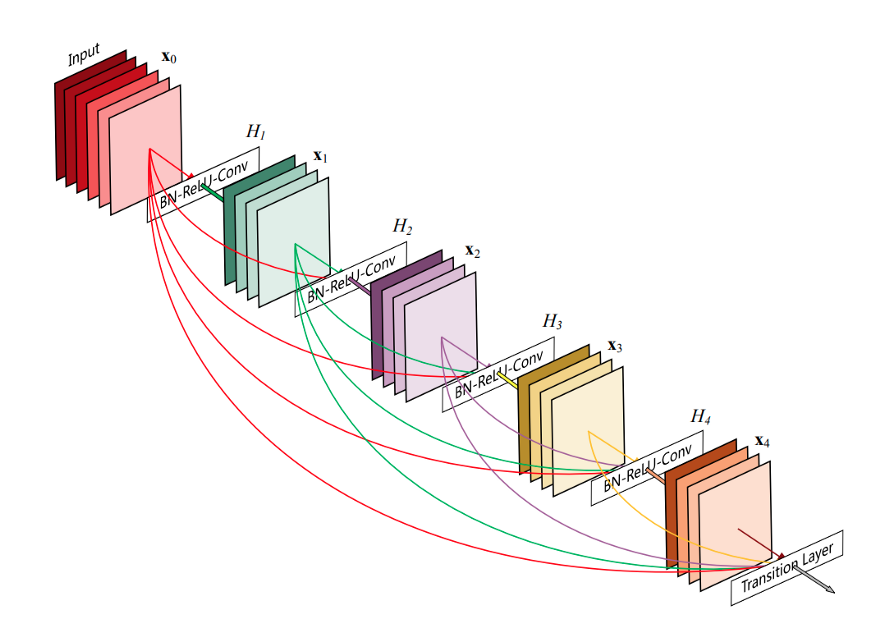

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
from keras.applications.densenet import DenseNet169
model = DenseNet169(include_top=False, weights= None, input_shape=(32, 32, 3))
# summarize the model
model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
len(model.layers)

595

In [ ]:
# add new classifier layers for cifar10 classification
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

flat = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat)
class2 = Dense(512, activation='relu')(class1)

prediction = Dense(10, activation='softmax')(class2)

model = Model(inputs=model.inputs, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
import time

In [ ]:
start = time.time()
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    verbose=1,
    validation_data=(x_test, y_test),
    batch_size=128
)
end = time.time()

epochs = [20, 30, 40, 50, 60, 70, 80, 90, 100]
acc_epoch = []

for epoch in epochs:
  acc_epoch.append(history.history.get('val_accuracy')[epoch-1])
  

Epoch 1/100
391/391 [==============================] - 108s 112ms/step - loss: 1.7415 - accuracy: 0.3797 - val_loss: 2.0118 - val_accuracy: 0.3417
Epoch 2/100
391/391 [==============================] - 32s 82ms/step - loss: 1.1359 - accuracy: 0.5928 - val_loss: 1.9917 - val_accuracy: 0.4322
Epoch 3/100
391/391 [==============================] - 31s 79ms/step - loss: 0.8840 - accuracy: 0.6903 - val_loss: 1.9369 - val_accuracy: 0.4502
Epoch 4/100
391/391 [==============================] - 31s 79ms/step - loss: 0.7444 - accuracy: 0.7426 - val_loss: 1.1218 - val_accuracy: 0.6344
Epoch 5/100
391/391 [==============================] - 31s 79ms/step - loss: 0.6171 - accuracy: 0.7894 - val_loss: 2.0770 - val_accuracy: 0.4884
Epoch 6/100
391/391 [==============================] - 31s 78ms/step - loss: 0.5293 - accuracy: 0.8190 - val_loss: 1.0988 - val_accuracy: 0.6481
Epoch 7/100
391/391 [==============================] - 31s 79ms/step - loss: 0.4521 - accuracy: 0.8443 - val_loss: 1.1823 - val_

In [ ]:
acc_epoch

[0.7332000136375427,
 0.7350999712944031,
 0.7860000133514404,
 0.7742000222206116,
 0.7634000182151794,
 0.772599995136261,
 0.7512000203132629,
 0.7865999937057495,
 0.7778000235557556]

In [ ]:
end-start

3193.2386837005615

In [ ]:
i = 0
for layer in model.layers:
  if 'pool' in layer.name or 'concat' in layer.name:
    print("Layer number: ", i, ", Name: ", layer.name)
  i += 1

Layer number:  6 , Name:  pool1
Layer number:  13 , Name:  conv2_block1_concat
Layer number:  20 , Name:  conv2_block2_concat
Layer number:  27 , Name:  conv2_block3_concat
Layer number:  34 , Name:  conv2_block4_concat
Layer number:  41 , Name:  conv2_block5_concat
Layer number:  48 , Name:  conv2_block6_concat
Layer number:  49 , Name:  pool2_bn
Layer number:  50 , Name:  pool2_relu
Layer number:  51 , Name:  pool2_conv
Layer number:  52 , Name:  pool2_pool
Layer number:  59 , Name:  conv3_block1_concat
Layer number:  66 , Name:  conv3_block2_concat
Layer number:  73 , Name:  conv3_block3_concat
Layer number:  80 , Name:  conv3_block4_concat
Layer number:  87 , Name:  conv3_block5_concat
Layer number:  94 , Name:  conv3_block6_concat
Layer number:  101 , Name:  conv3_block7_concat
Layer number:  108 , Name:  conv3_block8_concat
Layer number:  115 , Name:  conv3_block9_concat
Layer number:  122 , Name:  conv3_block10_concat
Layer number:  129 , Name:  conv3_block11_concat
Layer number

In [ ]:
exits = [52, 94, 140, 196, 252, 308, 368, 424, 480, 536]

In [ ]:
i = 1
for exit in exits:
  print(exit)
  exit_layer = model.layers[exit]
  Model(inputs = model.inputs, outputs = exit_layer.output).save_weights(f"/DenseNet169/Main_till_exit{i}_weights.h5")
  i += 1

52
94
140
196
252
308
368
424
480
536
